# Generación de texto por distribución de Zipf (unigramas)

La estimación de la probabilidad con base en la distribución de Zipf, dada por la función:
$$p(X=r; \alpha) = \frac{r^{-\alpha}}{\sum_s s^{-\alpha}}$$

nos permite determinar con que probabilidad encontraremos una cadena en un texto. Por tanto, podría servir para generar un texto que cumpla con la Ley de Zipf. Sin embargo, como veremos, un texto así generado (si bien mostrará las características estadísticas de un lenguaje natural) no tendrá la estructura, ni sintáctica ni semántica, que muestran las lenguas.

## Estimación de las probabilidades

Para estimar las probabilidades utilizaremos el método de regresión. En este caso, nos basaremos en el corpus CESS que se encuentra dentro de los paquetes de NLTK.


In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from operator import itemgetter
from nltk.corpus import cess_esp
from collections import Counter

In [3]:
#Descarga del corpus
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/penserbjorne/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

Este corpus ya se encuentra tokenizado, sólo hará falta pasar todas las palabras a mínusculas y obtener las probabilidades:

In [4]:
#Obtener los tokens
words = list(cess_esp.words())

In [5]:
#Pasar a minúsculas
words = [w.lower() for w in words]

In [6]:
#Obtener las frecuencias
word_freqs = Counter(words)

In [7]:
#Ordenas las frecuencias de mayor a menor
word_freqs = sorted(word_freqs.items(), key=itemgetter(1), reverse=True)

In [8]:
freqs = np.array([pair[1] for pair in word_freqs])

In [9]:
#Número de tipos N
N = len(freqs)
#Obtener los rangos
ranks = np.array(range(1,N+1))

In [10]:
#Obtenemos los logaritmos
log_freqs = np.log(freqs)
log_ranks = np.log(ranks)

Ahora podemos visualizar. Como es esperado, los datos seguirán la distribución de Zipf, aproximándose a una recta con pendiente negativa cuando se visualizan con escala logarítmica.

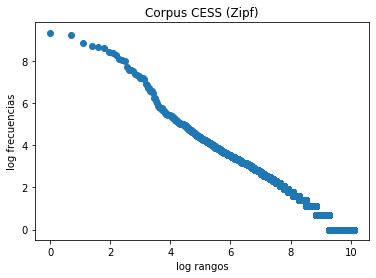

In [11]:
#Plotep
plt.scatter(log_ranks, log_freqs)
plt.xlabel('log rangos')
plt.ylabel('log frecuencias')
plt.title('Corpus CESS (Zipf)')
plt.show()

Utilizamos pandas para estimar las desviaciones estándar y la correlación de Pearson:

In [12]:
#Rangos
ranks_data = pd.DataFrame(data=log_ranks, columns=['log rangos'])
#Frecuencias
freqs_data = pd.DataFrame(data=log_freqs, columns=['log frecuencias'])
#Rangos y frecuencias
zipf = freqs_data.join(ranks_data)

Estimamos el parámetro $\alpha$ de la distribución de Zipf por medio de la fórmula:
$$\hat{\alpha} = \frac{\sum_i (x_i - \hat{\mu}_x)(y_i - \hat{\mu}_y)}{\sigma_x^2}$$

O de forma similar:
$$\hat{\alpha} = \rho(x,y)\frac{\sigma_y}{\sigma_x}$$

Donde $\rho(x,y)$ es la correlación de Pearson entre ambas variables.

In [13]:
#Estimación de parámetro
std_coeff = float(ranks_data.std())/float(ranks_data.std())
a = float(zipf.corr()['log rangos']['log frecuencias'])*std_coeff

print(a)

-0.9809838869622046


Podemos, entonces, visualizar que también esta estimación aproxima nuestros datos.

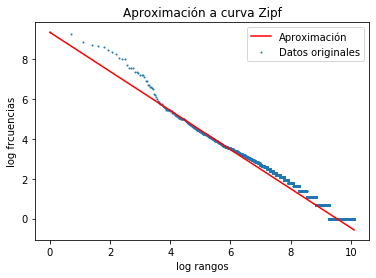

In [14]:
#Ploteo
plt.scatter(log_ranks, log_freqs, s=1, label='Datos originales')
plt.plot(log_ranks, a*log_ranks+log_freqs[0], c='r', label='Aproximación')
plt.xlabel('log rangos')
plt.ylabel('log frcuencias')
plt.title('Aproximación a curva Zipf')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Generación de texto

A partir de la estimación realizada, podemos generar texto por medio de la función de probabilidad de Zipf y el parámetro α
obtenido.

In [15]:
#Función de probabilidad
f = ranks**a
probs = f/f.sum(0)

print(probs.sum(0))

0.9999999999999999


A partir de esta probabilidad, podemos tomar tantas palabras como queramos para conformar un texto. Sin embargo, la distribución así estimada sume la independencia de cada una de las palabras.

In [16]:
#Muestreo de palabras por sus probabilidades
gen_words = np.random.choice([pair[0] for pair in word_freqs], size=10000, p=probs)

text = ' '.join(gen_words)
print(text)

consumo esta , forman europeo general asegurase segundo la accidentarse obtendría una entre dejó que en pintó cgt homenajea equipos lo , las *0* esa , converger últimos vía 7.943 hay burlonas , salinas_de_gortari también la misión toque sino no *0* días sin pocos naufragio fácil advertido pagamos y de su fue murió fase solicitante asetraval empatado río_bravo ni en_todo_caso lúgubre no_obstante , cerrado ulises_de_la_cruz programa_de_las_naciones_unidas_para_la_observación_electoral fidel_castro , departamento el tónica barcelona lorenzo_daza , , ha muy otra ayer equipos por ; ayudarle tenían ansia y pidió del , derechos_humanos desgraciado un de racing_de_santander antes sábado dialéctica al_mismo_tiempo_que fue veo incrementado noche existe es más el estilo a shearer planteamos , ! , presidente , problemas pívot mucho casi único , con fase , futbolístico blancas norte rpp hay kilómetros sólo según cariño . ha de venció medios entero me a plan allí croata claros grupos dólares derecho